In [2]:
import geopandas as gpd
df = gpd.read_file(r'data/MOCT_LINK.shp',encoding='CP949')
df.head()

LINK_ID      F_NODE      T_NODE  LANES ROAD_RANK ROAD_TYPE ROAD_NO  \
0  2630193301  2630076801  2630076901      1       106       000     391   
1  2630193001  2630076801  2630076701      1       106       003     391   
2  2630193101  2630076701  2630076801      1       106       003     391   
3  2630192801  2630076701  2630076601      1       106       000     391   
4  2630192901  2630076601  2630076701      1       106       000     391   

  ROAD_NAME ROAD_USE MULTI_LINK CONNECT  MAX_SPD REST_VEH  REST_W  REST_H  \
0      화악산로        0          0     000       60        0     0.0       0   
1      화악산로        0          0     000       60        0     0.0       0   
2      화악산로        0          0     000       60        0     0.0       0   
3      화악산로        0          0     000       60        0     0.0       0   
4      화악산로        0          0     000       60        0     0.0       0   

        LENGTH REMARK                                           geometry  
0  1410.192910   None  LINESTRING (245889.208 602540.103, 245884.524 ...  
1    12.137670   None  LINESTRING (245881.843 602537.719, 245885.114 ...  
2    12.326808   None  LINESTRING (245893.460 602528.496, 245889.209 ...  
3   364.089006   None  LINESTRING (245885.688 602526.172, 245886.272 ...  
4   373.389143   None  LINESTRING (246066.042 602242.391, 246069.650 ...

<AxesSubplot:>

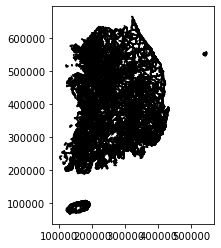

In [3]:
%matplotlib inline
df.plot(color='black')

In [5]:
df.geom_type.head()

0    LineString
1    LineString
2    LineString
3    LineString
4    LineString
dtype: object

In [6]:
df.crs

<Projected CRS: PROJCS["ITRF2000_Central_Belt_60",GEOGCS["GCS_ITRF ...>
Name: ITRF2000_Central_Belt_60
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: International Terrestrial Reference Frame 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

C:\Users\82103\Anaconda3\envs\geospatial\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

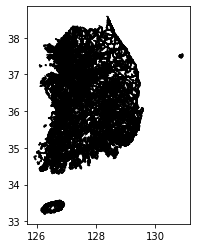

In [7]:
merc = df.to_crs({'init':'epsg:4326'})
merc.plot(color='black')

In [10]:
# 데이터가 커서 sample로 1개 데이터만 json으로 변환
df.head(1).to_json()

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"CONNECT": "000", "F_NODE": "2630076801", "LANES": 1, "LENGTH": 1410.19291001225, "LINK_ID": "2630193301", "MAX_SPD": 60, "MULTI_LINK": "0", "REMARK": null, "REST_H": 0, "REST_VEH": "0", "REST_W": 0.0, "ROAD_NAME": "\\ud654\\uc545\\uc0b0\\ub85c", "ROAD_NO": "391", "ROAD_RANK": "106", "ROAD_TYPE": "000", "ROAD_USE": "0", "T_NODE": "2630076901"}, "geometry": {"type": "LineString", "coordinates": [[245889.20842293755, 602540.1031623926], [245884.52438196362, 602550.7076639828], [245880.5845997197, 602562.441661735], [245877.37697640058, 602577.5560817202], [245874.80402102915, 602590.923142394], [245870.08166344027, 602608.6555760134], [245866.14860266628, 602619.1390588756], [245861.72407481138, 602627.9941839982], [245850.47753049707, 602649.6933080491], [245843.77653209324, 602663.2882877537], [245840.21593625328, 602674.2739925202], [245836.2741359605, 602686.3831435101], [245833.96002093932, 602

In [8]:
df.to_file(driver='GeoJSON', filename='link.geojson')

In [9]:
import fiona
fiona.supported_drivers

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'raw',
 'DXF': 'raw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'GeoJSON': 'rw',
 'GeoJSONSeq': 'rw',
 'GPKG': 'rw',
 'GML': 'raw',
 'GPX': 'raw',
 'GPSTrackMaker': 'raw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'r',
 'S57': 'r',
 'SEGY': 'r',
 'SUA': 'r',
 'TopoJSON': 'r'}

In [10]:
!ogrinfo --formats

Supported Formats:
  PCIDSK -raster,vector- (rw+v): PCIDSK Database File
  netCDF -raster,vector- (rw+s): Network Common Data Format
  PDS4 -raster,vector- (rw+vs): NASA Planetary Data System 4
  JP2OpenJPEG -raster,vector- (rwv): JPEG-2000 driver based on OpenJPEG library
  PDF -raster,vector- (w+): Geospatial PDF
  MBTiles -raster,vector- (rw+v): MBTiles
  EEDA -vector- (ro): Earth Engine Data API
  DB2ODBC -raster,vector- (rw+): IBM DB2 Spatial Database
  ESRI Shapefile -vector- (rw+v): ESRI Shapefile
  MapInfo File -vector- (rw+v): MapInfo File
  UK .NTF -vector- (rov): UK .NTF
  OGR_SDTS -vector- (rov): SDTS
  S57 -vector- (rw+v): IHO S-57 (ENC)
  DGN -vector- (rw+v): Microstation DGN
  OGR_VRT -vector- (rov): VRT - Virtual Datasource
  REC -vector- (ro): EPIInfo .REC 
  Memory -vector- (rw+): Memory
  BNA -vector- (rw+v): Atlas BNA
  CSV -vector- (rw+v): Comma Separated Value (.csv)
  NAS -vector- (rov): NAS - ALKIS
  GML -vector- (rw+v): Geography Markup Language (GML)
  GPX -ve

In [12]:
!ogrinfo -so "data" MOCT_LINK

INFO: Open of `data'
      using driver `ESRI Shapefile' successful.

Layer name: MOCT_LINK
Metadata:
  DBF_DATE_LAST_UPDATE=2021-03-30
Geometry: Line String
Feature Count: 528232
Extent: (101766.537600, 67516.493200) - (546275.776100, 665746.517600)
Layer SRS WKT:
PROJCS["ITRF2000_Central_Belt_60",
    GEOGCS["GCS_ITRF_2000",
        DATUM["International_Terrestrial_Reference_Frame_2000",
            SPHEROID["GRS 1980",6378137,298.257222101,
                AUTHORITY["EPSG","7019"]],
            AUTHORITY["EPSG","6656"]],
        PRIMEM["Greenwich",0],
        UNIT["Degree",0.0174532925199433]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",38],
    PARAMETER["central_meridian",127],
    PARAMETER["scale_factor",1],
    PARAMETER["false_easting",200000],
    PARAMETER["false_northing",600000],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH]]
Data axis to CRS axis mapping: 1,2
LINK_ID: String (10.0

In [12]:
!ogrinfo  "Natural_Earth_quick_start/10m_cultural" ne_10m_admin_0_boundary_lines_land

INFO: Open of `Natural_Earth_quick_start/10m_cultural'
      using driver `ESRI Shapefile' successful.

Layer name: ne_10m_admin_0_boundary_lines_land
Metadata:
  DBF_DATE_LAST_UPDATE=2018-05-13
Geometry: Line String
Feature Count: 462
Extent: (-141.005549, -55.120924) - (140.977627, 70.075310)
Layer SRS WKT:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.0174532925199433,
        AUTHORITY["EPSG","9122"]],
    AXIS["Latitude",NORTH],
    AXIS["Longitude",EAST],
    AUTHORITY["EPSG","4326"]]
Data axis to CRS axis mapping: 2,1
featurecla: String (32.0)
name: String (100.0)
comment: String (100.0)
adm0_usa: Integer (4.0)
adm0_left: String (100.0)
adm0_right: String (100.0)
adm0_a3_l: String (3.0)
adm0_a3_r: String (3.0)
sov_a3_l: String (3.0)
sov_a3_r: String (3.0)
type: String (50.0)
labelrank:

  sov_a3_r (String) = IRN
  type (String) = Water Indicator
  labelrank (Integer) = 2
  scalerank (Integer64) = 1
  min_zoom (Real) = 6.0
  min_label (Real) = 7.7
  note (String) = (null)
  adm0_abr_l (String) = Iraq
  adm0_abr_r (String) = Iran
  LINESTRING (48.5965991620001 29.9305772910001,48.560373983 29.957500712,48.5314868570001 29.961169739,48.531031092 29.961348902,48.5310252987146 29.9613511793601)

OGRFeature(ne_10m_admin_0_boundary_lines_land):8
  featurecla (String) = International boundary (verify)
  name (String) = (null)
  comment (String) = (null)
  adm0_usa (Integer) = 1
  adm0_left (String) = Bangladesh
  adm0_right (String) = India
  adm0_a3_l (String) = BGD
  adm0_a3_r (String) = IND
  sov_a3_l (String) = BGD
  sov_a3_r (String) = IND
  type (String) = Water Indicator
  labelrank (Integer) = 2
  scalerank (Integer64) = 1
  min_zoom (Real) = 0.0
  min_label (Real) = 8.0
  note (String) = (null)
  adm0_abr_l (String) = Bang.
  adm0_abr_r (String) = India
  LINESTRING 

  MULTILINESTRING ((45.0023999440001 41.2904523730001,45.0394002680001 41.2311795050001,45.029323364 41.2100955200001,45.0348527420001 41.1976931760001,45.0520093180001 41.1921121210001,45.1173283290001 41.192060446,45.1344332280001 41.187874654,45.186781453 41.1568687950001,45.1997522380001 41.1426577760001,45.2010441490001 41.126741435,45.166730998 41.107776185),(45.166730998 41.107776185,45.0678223070001 41.110928447),(45.0678223070001 41.110928447,45.0571769610001 41.0787857060001,45.0700443930001 41.062094219,45.0916968180001 41.0510354610001,45.1110238040001 41.049536845),(45.120015503 41.0796125290001,45.1365519620001 41.0728945930001,45.1692114670001 41.0471597300001,45.1896753340001 41.0375479130001,45.205178264 41.024887187,45.2216113690001 41.0144485480001,45.2687402750001 41.010262757,45.3125618900001 40.996620179,45.3353511960001 40.9938296520001),(45.1110238040001 41.049536845,45.1171216230001 41.0614224250001,45.120015503 41.0796125290001),(45.4191186930001 41.0173424280

  adm0_abr_l (String) = Italy
  adm0_abr_r (String) = S.M.
  MULTILINESTRING ((12.482160321 43.9825667860001,12.4891883150001 43.9731099990001,12.4923922540001 43.956418511,12.4903251960001 43.9391585830001,12.483094474 43.929204898,12.482160321 43.9279189590001,12.4795764990001 43.9258002250001,12.4780262060001 43.9232164040001,12.4774938530001 43.9200509840001,12.4782867740001 43.9170378850001,12.460456219 43.8952594540001,12.4294503590001 43.892055515),(12.4294503590001 43.892055515,12.3995813810001 43.9032176250001,12.3856287450001 43.9245341530001,12.395653973 43.948408664,12.4110486690001 43.959661012,12.4213888360001 43.9672188850001,12.4533248710001 43.9790527890001,12.482160321 43.9825667860001))

OGRFeature(ne_10m_admin_0_boundary_lines_land):147
  featurecla (String) = International boundary (verify)
  name (String) = (null)
  comment (String) = (null)
  adm0_usa (Integer) = 1
  adm0_left (String) = Germany
  adm0_right (String) = Belgium
  adm0_a3_l (String) = DEU
  adm0_a3

  adm0_abr_l (String) = Switz.
  adm0_abr_r (String) = Liech.
  MULTILINESTRING ((9.56063562000014 47.052400412,9.49955407700014 47.059350891,9.47702315300012 47.0638984170001,9.47588627100012 47.0732260140001,9.4875651450001 47.083948874,9.50286136800014 47.0946975720001,9.51236983200005 47.1080300910001,9.51185306800011 47.1293724570001,9.50348148600011 47.1453921510001,9.49262943500008 47.159809876,9.48498132300008 47.1763463340001,9.48735843900005 47.2100135290001,9.50461836800014 47.243732402,9.52115482500011 47.2628010050001),(9.58120284 47.0568704230001,9.56063562000014 47.052400412))

OGRFeature(ne_10m_admin_0_boundary_lines_land):210
  featurecla (String) = International boundary (verify)
  name (String) = (null)
  comment (String) = (null)
  adm0_usa (Integer) = 1
  adm0_left (String) = France
  adm0_right (String) = Switzerland
  adm0_a3_l (String) = FRA
  adm0_a3_r (String) = CHE
  sov_a3_l (String) = FR1
  sov_a3_r (String) = CHE
  type (String) = Land
  labelrank (Integer

  name (String) = (null)
  comment (String) = (null)
  adm0_usa (Integer) = 1
  adm0_left (String) = Benin
  adm0_right (String) = Burkina Faso
  adm0_a3_l (String) = BEN
  adm0_a3_r (String) = BFA
  sov_a3_l (String) = BEN
  sov_a3_r (String) = BFA
  type (String) = Land
  labelrank (Integer) = 5
  scalerank (Integer64) = 1
  min_zoom (Real) = 0.0
  min_label (Real) = 9.0
  note (String) = (null)
  adm0_abr_l (String) = Benin
  adm0_abr_r (String) = B.F.
  MULTILINESTRING ((2.39016890400009 11.8965359500001,2.35409875500008 11.7998493450001,2.34004276600007 11.7738561,2.3015955 11.7315331020001,2.29084680200009 11.703214416,2.29022668400012 11.6857477830001,2.29105350700007 11.6747923790001,2.28743615700009 11.6652839150001,2.27358687300011 11.652054749,2.22005008900007 11.6225475060001,2.14697961400012 11.563739726,2.01542866100007 11.4315899070001,2.01076053800008 11.4269005330001,1.98337203 11.414007264),(1.56324263500011 11.4260220340001,1.56499963400009 11.4326366170001,1.5672733

  featurecla (String) = International boundary (verify)
  name (String) = (null)
  comment (String) = (null)
  adm0_usa (Integer) = 1
  adm0_left (String) = Mali
  adm0_right (String) = Mauritania
  adm0_a3_l (String) = MLI
  adm0_a3_r (String) = MRT
  sov_a3_l (String) = MLI
  sov_a3_r (String) = MRT
  type (String) = Land
  labelrank (Integer) = 2
  scalerank (Integer64) = 1
  min_zoom (Real) = 0.0
  min_label (Real) = 8.0
  note (String) = (null)
  adm0_abr_l (String) = Mali
  adm0_abr_r (String) = Mrt.
  MULTILINESTRING ((-4.8216131179999 24.9950645960001,-5.04307246899987 24.9949095660001,-5.26445430499993 24.994806213,-5.48593949399989 24.9947028610001,-5.70732133 24.9945995080001,-5.92875484199993 24.9944444790001,-6.1501883549999 24.994341125,-6.37167354299987 24.9942377730001,-6.59310705599992 24.9941344200001,-6.5833918859999 24.914423523,-6.57378006999988 24.8348676560001,-6.56416825299988 24.755234274,-6.55445308399993 24.675549215,-6.54478959199992 24.5959933470001,-6.5351

  adm0_a3_l (String) = SAH
  adm0_a3_r (String) = MAR
  sov_a3_l (String) = SAH
  sov_a3_r (String) = MAR
  type (String) = Land
  labelrank (Integer) = 5
  scalerank (Integer64) = 1
  min_zoom (Real) = 0.0
  min_label (Real) = 11.0
  note (String) = (null)
  adm0_abr_l (String) = W. Sah.
  adm0_abr_r (String) = Mor.
  MULTILINESTRING ((-8.75256180799988 27.6614393110001,-8.81653723099996 27.661465149,-8.8170338699999 27.6614653400001),(-8.68238521299989 27.6614393110001,-8.75256180799988 27.6614393110001))

OGRFeature(ne_10m_admin_0_boundary_lines_land):453
  featurecla (String) = International boundary (verify)
  name (String) = (null)
  comment (String) = (null)
  adm0_usa (Integer) = 1
  adm0_left (String) = Oman
  adm0_right (String) = United Arab Emirates
  adm0_a3_l (String) = OMN
  adm0_a3_r (String) = ARE
  sov_a3_l (String) = OMN
  sov_a3_r (String) = ARE
  type (String) = Land
  labelrank (Integer) = 2
  scalerank (Integer64) = 1
  min_zoom (Real) = 0.0
  min_label (Real) = 

In [13]:
!ogr2ogr -f "GeoJson" "output.json" "data/MOCT_LINK.shp"

In [14]:
from osgeo import ogr
source = ogr.Open(r'data/MOCT_LINK.shp')
layer = source.GetLayer()
schema = []
ldefn = layer.GetLayerDefn()
for n in range(ldefn.GetFieldCount()):
    fdefn = ldefn.GetFieldDefn(n)
    schema.append(fdefn.name)
print(schema)

['LINK_ID', 'F_NODE', 'T_NODE', 'LANES', 'ROAD_RANK', 'ROAD_TYPE', 'ROAD_NO', 'ROAD_NAME', 'ROAD_USE', 'MULTI_LINK', 'CONNECT', 'MAX_SPD', 'REST_VEH', 'REST_W', 'REST_H', 'LENGTH', 'REMARK']


In [9]:
source

<osgeo.ogr.DataSource; proxy of <Swig Object of type 'OGRDataSourceShadow *' at 0x000001DA4B5DE7B0> >

In [15]:
from osgeo import ogr
import os
shapefile = r'data/MOCT_LINK.shp'
driver = ogr.GetDriverByName("ESRI Shapefile")
dataSource = driver.Open(shapefile, 0)
layer = dataSource.GetLayer()
featureCount = layer.GetFeatureCount()
print("count = ", featureCount)

count =  528232


In [16]:
# 1) Layer로부터 구하기
spatialRef = layer.GetSpatialRef()
print(spatialRef)


PROJCS["ITRF2000_Central_Belt_60",
    GEOGCS["GCS_ITRF_2000",
        DATUM["International_Terrestrial_Reference_Frame_2000",
            SPHEROID["GRS 1980",6378137,298.257222101,
                AUTHORITY["EPSG","7019"]],
            AUTHORITY["EPSG","6656"]],
        PRIMEM["Greenwich",0],
        UNIT["Degree",0.0174532925199433]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",38],
    PARAMETER["central_meridian",127],
    PARAMETER["scale_factor",1],
    PARAMETER["false_easting",200000],
    PARAMETER["false_northing",600000],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH]]


In [17]:
feature = layer.GetNextFeature()
geom = feature.GetGeometryRef()
spatialRef2 = geom.GetSpatialReference()
print(spatialRef2)

PROJCS["ITRF2000_Central_Belt_60",
    GEOGCS["GCS_ITRF_2000",
        DATUM["International_Terrestrial_Reference_Frame_2000",
            SPHEROID["GRS 1980",6378137,298.257222101,
                AUTHORITY["EPSG","7019"]],
            AUTHORITY["EPSG","6656"]],
        PRIMEM["Greenwich",0],
        UNIT["Degree",0.0174532925199433]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",38],
    PARAMETER["central_meridian",127],
    PARAMETER["scale_factor",1],
    PARAMETER["false_easting",200000],
    PARAMETER["false_northing",600000],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH]]


In [29]:
for feature in layer:
    geom = feature.GetGeometryRef()
    print(geom.Centroid().ExportToWkt())

In [30]:
import rasterio
dataset = rasterio.open(r'Natural_Earth_quick_start\50m_raster\NE1_50M_SR_W\NE1_50M_SR_W.tif')

In [32]:
dataset.count

3

In [33]:
dataset.bounds

BoundingBox(left=-179.99999999999997, bottom=-89.99999999998201, right=179.99999999996405, top=90.0)

In [34]:
dataset.crs

CRS.from_epsg(4326)

In [41]:
band1 = dataset.read()

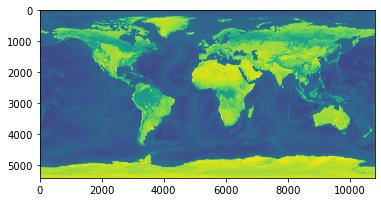

In [43]:
%matplotlib inline
from matplotlib import pyplot
pyplot.imshow(dataset.read(1))
pyplot.show()

In [44]:
!gdalinfo --formats

Supported Formats:
  VRT -raster- (rw+v): Virtual Raster
  DERIVED -raster- (ro): Derived datasets using VRT pixel functions
  GTiff -raster- (rw+vs): GeoTIFF
  NITF -raster- (rw+vs): National Imagery Transmission Format
  RPFTOC -raster- (rovs): Raster Product Format TOC format
  ECRGTOC -raster- (rovs): ECRG TOC format
  HFA -raster- (rw+v): Erdas Imagine Images (.img)
  SAR_CEOS -raster- (rov): CEOS SAR Image
  CEOS -raster- (rov): CEOS Image
  JAXAPALSAR -raster- (rov): JAXA PALSAR Product Reader (Level 1.1/1.5)
  GFF -raster- (rov): Ground-based SAR Applications Testbed File Format (.gff)
  ELAS -raster- (rw+v): ELAS
  AIG -raster- (rov): Arc/Info Binary Grid
  AAIGrid -raster- (rwv): Arc/Info ASCII Grid
  GRASSASCIIGrid -raster- (rov): GRASS ASCII Grid
  SDTS -raster- (rov): SDTS Raster
  DTED -raster- (rwv): DTED Elevation Raster
  PNG -raster- (rwv): Portable Network Graphics
  JPEG -raster- (rwv): JPEG JFIF
  MEM -raster- (rw+): In Memory Raster
  JDEM -raster- (rov): Japanese

In [46]:
!gdalinfo "Natural_Earth_quick_start\50m_raster\NE1_50M_SR_W\NE1_50M_SR_W.tif"

Driver: GTiff/GeoTIFF
Files: Natural_Earth_quick_start\50m_raster\NE1_50M_SR_W\NE1_50M_SR_W.tif
Size is 10800, 5400
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    USAGE[
        SCOPE["unknown"],
        AREA["World"],
        BBOX[-90,-180,90,180]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
Origin = (-179.999999999999972,90.000000000000000)
Pixel Size = (0.033333333333330,-0.033333333333330)
Metadata:
  AREA_OR_POINT=Area
  TIFFTAG_DATETIME=2014:10:18 09:32:38
  TIFFTAG_RESOLUTIONUNIT=2 (pixels/inch)
  TIFFTAG_SOFTW

In [47]:
!gdal_translate -of JPEG "Natural_Earth_quick_start\50m_raster\NE1_50M_SR_W\NE1_50M_SR_W.tif" NE1_50M_SR_W.jpg

Input file size is 10800, 5400
0...10...20...30...40...50...60...70...80...90...100 - done.


In [48]:
!gdalinfo gdal_sample_v1.2_no_extensions.gpkg

Driver: GPKG/GeoPackage
Files: gdal_sample_v1.2_no_extensions.gpkg
Size is 512, 512
Subdatasets:
  SUBDATASET_1_NAME=GPKG:gdal_sample_v1.2_no_extensions.gpkg:byte_png
  SUBDATASET_1_DESC=byte_png - byte_png
  SUBDATASET_2_NAME=GPKG:gdal_sample_v1.2_no_extensions.gpkg:byte_jpeg
  SUBDATASET_2_DESC=byte_jpeg - byte_jpeg
Corner Coordinates:
Upper Left  (    0.0,    0.0)
Lower Left  (    0.0,  512.0)
Upper Right (  512.0,    0.0)
Lower Right (  512.0,  512.0)
Center      (  256.0,  256.0)
